# Student recommendation quality

How does your ability to recommend a student changes as a function of the number of students?

Let's say you're writing recommendation letters for students, and the place wants you to provide a percentile. Like "This student is in the top 5% of all I worked with this year", or something like that. Let's also assume that every studenet has some "actual objective quality" that you cannot know precisely, but can kinda try to learn; and that these "objective qualities" are distributed normally.

Then your ability to correctly measure the quality of student may tend to decrease with the number of students (as you would know each student less, having less time to work with them), but it also may tend to increase with the number of student, as you will guess the actual distribution of qualities better and better, as you get more students. So, which tendency will win, and what is the optimal number of students to observe, from the purely recommendation quality point of view?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

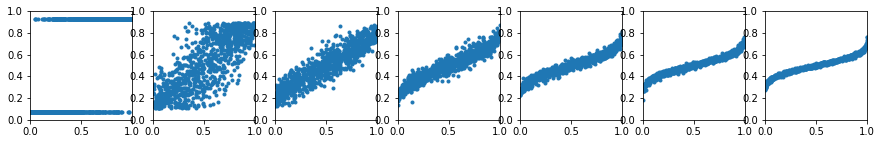

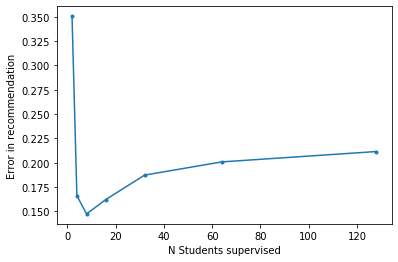

In [32]:
classsize = np.array([2,4,8,16,32,64,128])
npoints = classsize.shape[0]
nexperiments = 1000
out = np.zeros(npoints)

plt.figure(figsize=(15,2))
for ipoint in range(npoints):
    n = classsize[ipoint]
    temp = []
    plt.subplot(1, npoints, ipoint+1)
    plt.xlim(0,1)
    plt.ylim(0,1)
    ratings = []
    actuals = []
    for iexp in range(nexperiments):
        students = np.random.normal(size=n)
        x = students[0]         # Our student of interest (for whom we're writing a letter)
        m = np.mean(students)
        s = np.std(students)    
        knowledge = 1/np.log(n)         # knowledge of each student decresease with N_students
        # (And this assignment is crucial. If it creases linearly, nothing works at all)
        
        # guess = x # Perfect guess        
        # guess = x*knowledge # regressing to actual mean
        guess = x*knowledge + m*(1-knowledge) # regressing to the observed mean
        # guess = x*knowledge + np.random.normal()*(1-knowledge) # regressing to a random guess
        
        z = (guess-m)/s        
        actual = stats.norm.cdf(x)
        rating = stats.norm.cdf(z)
        temp.append(rating-actual)        
        actuals.append(actual)
        ratings.append(rating)
    
    plt.plot(actuals, ratings, '.')
    out[ipoint] = np.std(temp)
    
plt.figure()
plt.plot(classsize, out, '.-');
plt.xlabel('N Students supervised');
plt.ylabel('Error in recommendation');

As it turns out, the model is very sensitive to the "knowledge" calculation - that is, just how quickly you knowledge of a student deteriorates. Like, if your quality of knowing the student $q$ decays as $1/q$ then your guesses are never better than a random guess. If it decays slower, there's an optimum; for example for $k \sim 1/\sqrt{n}$ it peaks at about 10 students. Same for $k \sim 1/\log(n)$ actually. So maybe not _that_ sensitive, provided that it decreases slowly enough? Still doesn't feel like a reliable calculation haha :)